# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import pytz
from datetime import datetime



%matplotlib inline

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv("/Users/matt/Desktop/Instructions/Starter_Code/key.env")

False

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc=1000
my_eth=10000

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
response_btc_data=requests.get(btc_url)
# Fetch current ETH price
# YOUR CODE HERE!
response_eth_data=requests.get(eth_url)
# Compute current value of my crpto
# YOUR CODE HERE!
response_btc_content=response_btc_data.content
response_eth_content=response_eth_data.content

btc_data=response_btc_data.json()
eth_data=response_eth_data.json()

my_btc_value=btc_data['data']['1']['quotes']['USD']['price']
my_eth_value=eth_data['data']['1027']['quotes']['USD']['price']

# display(btc_data)
# display(eth_data)
# print("/n")
# display(my_btc_value)
# display(my_eth_value)
# print(btc_data['data'].keys())
# print(eth_data['data'].keys())



# # Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1000 BTC is $29927.00
The current value of your 10000 ETH is $1890.44


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
load_dotenv('.env')
api_key=os.getenv('ALPACA_API_KEY')
api_secret=os.getenv('ALPACA_SECRET_KEY')

# display(type(api_key))
# display(type(api_secret))


# Create the Alpaca API object
# YOUR CODE HERE!
alpaca=tradeapi.REST(
    api_key,
    api_secret,
    api_version='v2')




In [8]:
# Format current date as ISO format
# YOUR CODE HERE!
start=pd.Timestamp("2022-07-15", tz="America/New_York").isoformat()
today=pd.Timestamp("2023-07-15", tz="America/New_York").isoformat()


# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
tickers_df=alpaca.get_bars(
    tickers,
    timeframe,
    start = start,
    end = today
).df

# display(tickers_df.head())
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
agg=tickers_df[tickers_df['symbol']=='AGG'].drop('symbol', axis=1)
spy=tickers_df[tickers_df['symbol']=='SPY'].drop('symbol', axis=1)

# # Concatenate the ticker DataFrames
# # YOUR CODE HERE!
combined_df = pd.concat([agg,spy], axis=1, keys=['AGG','SPY'])
# # Preview DataFrame
# # YOUR CODE HERE!

display(combined_df)

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2022-07-15 04:00:00+00:00  101.94  102.3500  101.9000  102.25  8440151   
2022-07-18 04:00:00+00:00  102.00  102.0300  101.7200  101.92  4948342   
2022-07-19 04:00:00+00:00  101.95  101.9900  101.6615  101.78  4240241   
2022-07-20 04:00:00+00:00  102.16  102.1700  101.6650  101.71  6109282   
2022-07-21 04:00:00+00:00  101.96  102.5800  101.9600  102.56  5059517   
...                           ...       ...       ...     ...      ...   
2023-07-10 04:00:00+00:00   96.57   96.9400   96.5500   96.80  8827590   
2023-07-11 04:00:00+00:00   96.94   97.0999   96.8550   97.01  5978762   
2023-07-12 04:00:00+00:00   97.51   97.8499   97.4500   97.80  7189081   
2023-07-13 04:00:00+00:00   98.18   98.4400   98.1150   98.41  7458509   
2023-07-14 04:00:00+00:00   98.23   98.3100   97.9200   97.94  7208357   

                                                       SPY                     \
                          trade_count        vwap     open      high      low   
timestamp                                                                       
2022-07-15 04:00:00+00:00       27300  102.214854  382.550  385.2500  380.540   
2022-07-18 04:00:00+00:00       18801  101.892819  388.380  389.0900  380.660   
2022-07-19 04:00:00+00:00       18208  101.821971  386.080  392.8700  385.400   
2022-07-20 04:00:00+00:00       17836  101.767981  392.470  396.2600  391.030   
2022-07-21 04:00:00+00:00       19615  102.328893  394.160  398.8400  391.630   
...                               ...         ...      ...       ...      ...   
2023-07-10 04:00:00+00:00       25752   96.779980  438.180  439.8400  437.585   
2023-07-11 04:00:00+00:00       28609   96.979786  440.450  442.9700  439.440   
2023-07-12 04:00:00+00:00       23483   97.718226  446.390  447.4799  444.910   
2023-07-13 04:00:00+00:00       31270   98.343983  447.900  450.3800  447.450   
2023-07-14 04:00:00+00:00       21903   98.096753  450.475  451.3600  448.490   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-07-15 04:00:00+00:00  385.13  78742871      488111  383.323926  
2022-07-18 04:00:00+00:00  381.95  62864897      489551  385.089006  
2022-07-19 04:00:00+00:00  392.27  78159593      533269  389.362454  
2022-07-20 04:00:00+00:00  394.77  70075073      525918  394.158847  
2022-07-21 04:00:00+00:00  398.79  63527356      520934  396.079426  
...                           ...       ...         ...         ...  
2023-07-10 04:00:00+00:00  439.66  62463516      419697  438.887420  
2023-07-11 04:00:00+00:00  442.46  64479814      456582  441.225755  
2023-07-12 04:00:00+00:00  446.02  91949783      585806  445.659246  
2023-07-13 04:00:00+00:00  449.56  72425241      449368  448.598241  
2023-07-14 04:00:00+00:00  449.28  69730670      484025  449.818675  

[251 rows x 14 columns]

In [9]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
df_close_prices=pd.DataFrame()

df_close_prices['AGG'] = combined_df['AGG']["close"]
df_close_prices['SPY'] = combined_df['SPY']["close"]

# display(df_close_prices)


last_row_spy = df_close_prices.tail(1)
spy_close_price = last_row_spy["SPY"].values[0]

last_row_agg = df_close_prices.tail(1)
agg_close_price = last_row_agg["AGG"].values[0]




# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $97.94
Current SPY closing price: $449.28


In [10]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value=spy_close_price*my_spy
my_agg_value=agg_close_price*my_agg
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22464.00
The current value of your 200 AGG shares is $19588.00


### Savings Health Analysis

In [49]:
# The `df_savings` DataFrame should have one column named `amount` and two rows where `crypto` and `shares` are the index values:
# Set monthly household income
# YOUR CODE HERE!
monthly_income=12000
# Consolidate financial assets data
# YOUR CODE HERE!
combined_crypto_assets=my_btc+my_eth
combined_shares=my_spy+my_agg
savings_data=[combined_crypto_assets, combined_shares]
index_name=["Crypto", "Shares"]
column_name=["Amount"]
total_value_stocks=(my_spy*my_spy_value)+(my_agg*my_agg_value)
total_value_crypto=(my_btc*my_btc_value)+(my_eth*my_eth_value)
# Create savings DataFrame
# YOUR CODE HERE!
df_savings=pd.DataFrame([total_value_stocks, total_value_crypto], index_name, column_name)
# Display savings DataFrame
display(df_savings)

,Amount
Crypto,5040800.0
Shares,48831400.0


array([<Axes: ylabel='Amount'>], dtype=object)

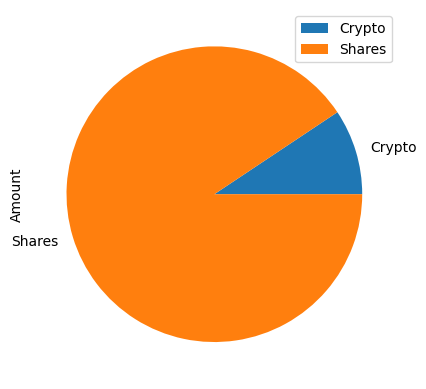

In [50]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot(kind='pie', subplots=True)

In [58]:
# 4. Use `if` conditional statements to validate if the current savings are enough for an emergency fund. An ideal emergency fund should be equal to three times your monthly income.

# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings=total_value_crypto+total_value_stocks

# display(total_savings)

    
# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund: 
    print('congrats')
elif total_savings == emergency_fund:
    print('congrats youre on track')
else:
    amount_short=total_saving-emergency_fund
    print(amount_short)


congrats


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-07-15', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-07-15', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
mc_tickers_df=alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
mc_spy=mc_tickers_df[mc_tickers_df['symbol']=='SPY'].drop('symbol', axis=1)
mc_agg=mc_tickers_df[mc_tickers_df['symbol']=='AGG'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stock_data=pd.concat([spy, agg], axis=1, keys=['SPY', 'AGG'])


# Display sample data
df_stock_data.head()

SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2022-07-15 04:00:00+00:00  382.55  385.25  380.54  385.13  78742871   
2022-07-18 04:00:00+00:00  388.38  389.09  380.66  381.95  62864897   
2022-07-19 04:00:00+00:00  386.08  392.87  385.40  392.27  78159593   
2022-07-20 04:00:00+00:00  392.47  396.26  391.03  394.77  70075073   
2022-07-21 04:00:00+00:00  394.16  398.84  391.63  398.79  63527356   

                                                      AGG                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2022-07-15 04:00:00+00:00      488111  383.323926  101.94  102.35  101.9000   
2022-07-18 04:00:00+00:00      489551  385.089006  102.00  102.03  101.7200   
2022-07-19 04:00:00+00:00      533269  389.362454  101.95  101.99  101.6615   
2022-07-20 04:00:00+00:00      525918  394.158847  102.16  102.17  101.6650   
2022-07-21 04:00:00+00:00      520934  396.079426  101.96  102.58  101.9600   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-07-15 04:00:00+00:00  102.25  8440151       27300  102.214854  
2022-07-18 04:00:00+00:00  101.92  4948342       18801  101.892819  
2022-07-19 04:00:00+00:00  101.78  4240241       18208  101.821971  
2022-07-20 04:00:00+00:00  101.71  6109282       17836  101.767981  
2022-07-21 04:00:00+00:00  102.56  5059517       19615  102.328893

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
num_sims=100

mc_equities=MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 7560
)


In [17]:
# Printing the simulation input data
# YOUR CODE HERE!
df_stock_data.head()

SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2022-07-15 04:00:00+00:00  382.55  385.25  380.54  385.13  78742871   
2022-07-18 04:00:00+00:00  388.38  389.09  380.66  381.95  62864897   
2022-07-19 04:00:00+00:00  386.08  392.87  385.40  392.27  78159593   
2022-07-20 04:00:00+00:00  392.47  396.26  391.03  394.77  70075073   
2022-07-21 04:00:00+00:00  394.16  398.84  391.63  398.79  63527356   

                                                      AGG                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2022-07-15 04:00:00+00:00      488111  383.323926  101.94  102.35  101.9000   
2022-07-18 04:00:00+00:00      489551  385.089006  102.00  102.03  101.7200   
2022-07-19 04:00:00+00:00      533269  389.362454  101.95  101.99  101.6615   
2022-07-20 04:00:00+00:00      525918  394.158847  102.16  102.17  101.6650   
2022-07-21 04:00:00+00:00      520934  396.079426  101.96  102.58  101.9600   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-07-15 04:00:00+00:00  102.25  8440151       27300  102.214854  
2022-07-18 04:00:00+00:00  101.92  4948342       18801  101.892819  
2022-07-19 04:00:00+00:00  101.78  4240241       18208  101.821971  
2022-07-20 04:00:00+00:00  101.71  6109282       17836  101.767981  
2022-07-21 04:00:00+00:00  102.56  5059517       19615  102.328893

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
mc_equities.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012984,1.010393,0.990999,0.998521,0.982381,0.995745,0.999670,0.994468,0.997457,0.994004,...,0.997843,0.988445,0.998815,1.005775,0.997803,0.993839,0.992151,1.005388,1.008354,0.997506
2,1.014202,1.009365,0.993055,0.995578,0.985079,1.000107,1.002845,0.988780,1.007978,0.995103,...,0.998051,0.988726,0.997289,0.991826,0.998447,0.994001,0.993160,1.014357,1.014561,1.001291
3,1.019014,0.996854,0.994006,0.987773,0.987258,1.000935,0.988687,0.982606,1.009153,1.005923,...,1.000008,0.977785,1.002927,0.992297,1.009493,0.988718,0.989991,1.015967,1.017692,1.001179
4,1.024918,0.987305,0.983087,0.986225,0.989287,1.005136,0.988333,1.004925,1.010616,1.015388,...,1.004693,0.974773,1.004140,0.995613,1.011383,1.002900,0.993570,1.024223,1.026382,1.014853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,20.456502,3.111977,3.810042,7.328323,24.328397,11.083395,5.138539,6.049301,9.331937,2.268853,...,8.627541,4.492201,5.157241,5.130671,7.051743,9.901106,5.888492,16.669482,5.777020,23.343284
7557,20.330707,3.111287,3.793844,7.316285,24.366138,11.019023,5.171871,6.108382,9.292030,2.255310,...,8.657828,4.518607,5.202378,5.100560,7.010618,9.926582,5.930004,16.776533,5.720011,23.364022
7558,20.347312,3.146120,3.807305,7.348432,24.038487,10.902358,5.135763,6.135998,9.242129,2.256839,...,8.683559,4.551786,5.263761,5.130620,7.017877,9.876691,5.913935,16.814936,5.685005,23.327749
7559,20.310635,3.122223,3.826859,7.353121,24.098646,10.905079,5.168430,6.145197,9.198832,2.264159,...,8.714209,4.531387,5.294729,5.137401,6.958774,9.858897,5.961192,16.909694,5.716729,23.285622


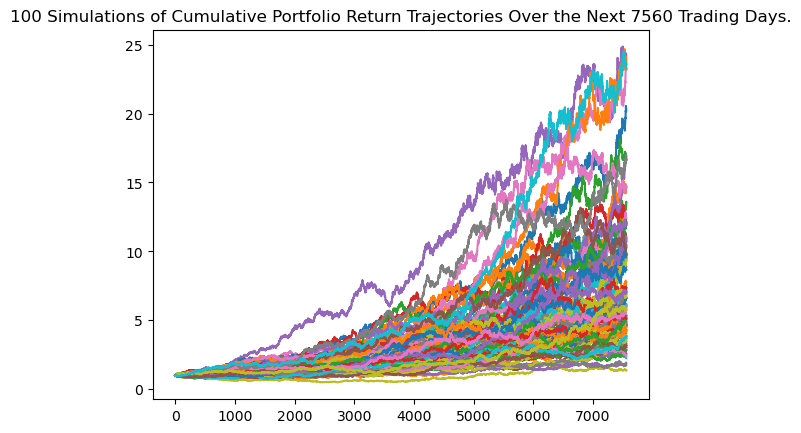

In [19]:
# Plot simulation outcomes
# YOUR CODE HERE!
mc_line_plot=mc_equities.plot_simulation()

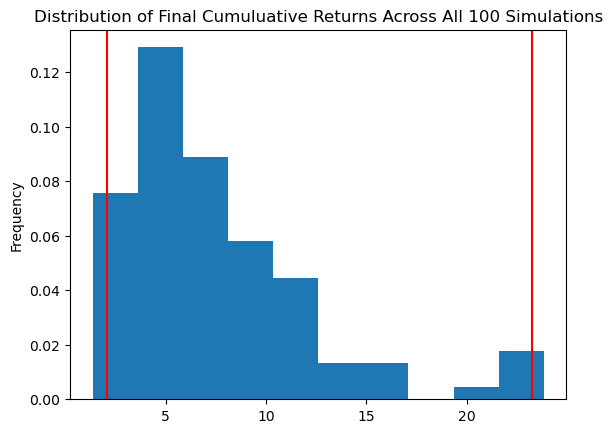

In [20]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
mc_dist_plot=mc_equities.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_summary=mc_equities.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
display(tbl_summary)

/Users/matt/Desktop/Instructions/Starter_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           100.000000
mean              7.611240
std               4.990204
min               1.377864
25%               4.251050
50%               6.089229
75%               9.782287
max              23.830992
95% CI Lower      2.072802
95% CI Upper     23.259157
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower=round(tbl_summary[8]*initial_investment,2)
ci_upper=round(tbl_summary[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $41456.04 and $465183.15


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower=round(tbl_summary[8]*initial_investment,2)
ci_upper=round(tbl_summary[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $62184.06 and $697774.72


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
timeframe="1Day"

start_date_five=pd.Timestamp("2018-07-17", tz="America/New_York").isoformat()
end_date_five=pd.Timestamp("2023-07-17", tz="America/New_York").isoformat()

tickers=["SPY", "AGG"]

five_year_tickers_df=alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date_five,
    end=end_date_five
).df


five_year_tickers_df.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2018-07-17 04:00:00+00:00,106.40,106.450,106.290,106.35,2964110,10450,106.371231,AGG
2018-07-18 04:00:00+00:00,106.36,106.385,106.270,106.32,1760878,14103,106.336028,AGG
2018-07-19 04:00:00+00:00,106.34,106.545,106.310,106.48,2163268,10957,106.448966,AGG
2018-07-20 04:00:00+00:00,106.38,106.440,106.200,106.27,3024605,12352,106.269989,AGG
2018-07-23 04:00:00+00:00,106.17,106.185,105.885,105.90,1848649,8661,105.971451,AGG


In [25]:
five_spy=five_year_tickers_df[five_year_tickers_df['symbol']=='SPY'].drop('symbol', axis=1)
five_agg=five_year_tickers_df[five_year_tickers_df['symbol']=='AGG'].drop('symbol', axis=1)

five_year_combined=pd.concat([spy, agg], axis=1, keys=["SPY", "AGG"])

five_year_combined

SPY                                       \
                              open      high      low   close    volume   
timestamp                                                                 
2022-07-15 04:00:00+00:00  382.550  385.2500  380.540  385.13  78742871   
2022-07-18 04:00:00+00:00  388.380  389.0900  380.660  381.95  62864897   
2022-07-19 04:00:00+00:00  386.080  392.8700  385.400  392.27  78159593   
2022-07-20 04:00:00+00:00  392.470  396.2600  391.030  394.77  70075073   
2022-07-21 04:00:00+00:00  394.160  398.8400  391.630  398.79  63527356   
...                            ...       ...      ...     ...       ...   
2023-07-10 04:00:00+00:00  438.180  439.8400  437.585  439.66  62463516   
2023-07-11 04:00:00+00:00  440.450  442.9700  439.440  442.46  64479814   
2023-07-12 04:00:00+00:00  446.390  447.4799  444.910  446.02  91949783   
2023-07-13 04:00:00+00:00  447.900  450.3800  447.450  449.56  72425241   
2023-07-14 04:00:00+00:00  450.475  451.3600  448.490  449.28  69730670   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2022-07-15 04:00:00+00:00      488111  383.323926  101.94  102.3500  101.9000   
2022-07-18 04:00:00+00:00      489551  385.089006  102.00  102.0300  101.7200   
2022-07-19 04:00:00+00:00      533269  389.362454  101.95  101.9900  101.6615   
2022-07-20 04:00:00+00:00      525918  394.158847  102.16  102.1700  101.6650   
2022-07-21 04:00:00+00:00      520934  396.079426  101.96  102.5800  101.9600   
...                               ...         ...     ...       ...       ...   
2023-07-10 04:00:00+00:00      419697  438.887420   96.57   96.9400   96.5500   
2023-07-11 04:00:00+00:00      456582  441.225755   96.94   97.0999   96.8550   
2023-07-12 04:00:00+00:00      585806  445.659246   97.51   97.8499   97.4500   
2023-07-13 04:00:00+00:00      449368  448.598241   98.18   98.4400   98.1150   
2023-07-14 04:00:00+00:00      484025  449.818675   98.23   98.3100   97.9200   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-07-15 04:00:00+00:00  102.25  8440151       27300  102.214854  
2022-07-18 04:00:00+00:00  101.92  4948342       18801  101.892819  
2022-07-19 04:00:00+00:00  101.78  4240241       18208  101.821971  
2022-07-20 04:00:00+00:00  101.71  6109282       17836  101.767981  
2022-07-21 04:00:00+00:00  102.56  5059517       19615  102.328893  
...                           ...      ...         ...         ...  
2023-07-10 04:00:00+00:00   96.80  8827590       25752   96.779980  
2023-07-11 04:00:00+00:00   97.01  5978762       28609   96.979786  
2023-07-12 04:00:00+00:00   97.80  7189081       23483   97.718226  
2023-07-13 04:00:00+00:00   98.41  7458509       31270   98.343983  
2023-07-14 04:00:00+00:00   97.94  7208357       21903   98.096753  

[251 rows x 14 columns]

In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!


five_year_mc=MCSimulation(
    portfolio_data=five_year_combined,
    weights=[.80,.20],
    num_simulation=50,
    num_trading_days=252*5
)

five_year_mc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001254,0.995089,0.995537,1.004952,0.997402,1.009327,0.989910,1.002859,1.005198,1.013746,...,0.993039,0.977272,1.005740,0.998282,0.981376,1.005747,1.006202,1.010704,1.005689,0.992577
2,0.997223,0.978194,1.003312,1.012316,1.019976,1.010482,0.980440,1.016326,0.995805,1.021532,...,0.991939,0.990166,1.013865,0.993916,0.976771,1.021371,1.004618,1.008049,1.022865,0.996866
3,0.998643,0.978070,1.017934,1.023542,1.009454,0.999219,0.979515,0.999481,0.996823,1.029825,...,0.996316,0.991154,0.998799,0.989276,0.971654,1.022092,0.984106,0.993203,1.029172,1.002905
4,0.995282,0.992108,1.013777,1.034002,1.017407,0.994641,0.971845,1.004191,0.988526,1.026932,...,1.004852,0.993052,0.985216,0.995053,0.977569,1.030535,0.971507,0.968835,1.032256,0.997603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.226354,1.241914,1.640927,1.671711,1.374286,1.307683,1.535540,3.540037,1.223258,2.471271,...,2.215580,3.886458,2.806768,2.030441,1.434759,1.546491,1.757623,2.049463,3.493227,2.186194
1257,1.203171,1.239167,1.639827,1.695816,1.368199,1.323298,1.518663,3.565671,1.244660,2.410908,...,2.220886,3.950926,2.803411,2.053795,1.451222,1.524939,1.745612,2.036656,3.509637,2.210902
1258,1.209807,1.244729,1.610024,1.703238,1.356955,1.344626,1.515374,3.544156,1.248495,2.408162,...,2.238279,3.966297,2.808792,2.071235,1.442179,1.533544,1.747995,2.026680,3.467159,2.229696
1259,1.211048,1.232408,1.627623,1.700452,1.364554,1.336122,1.506942,3.517751,1.258262,2.407879,...,2.271293,4.058974,2.848194,2.069141,1.433862,1.534129,1.752921,2.041951,3.438002,2.234916


<Axes: title={'center': '50 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

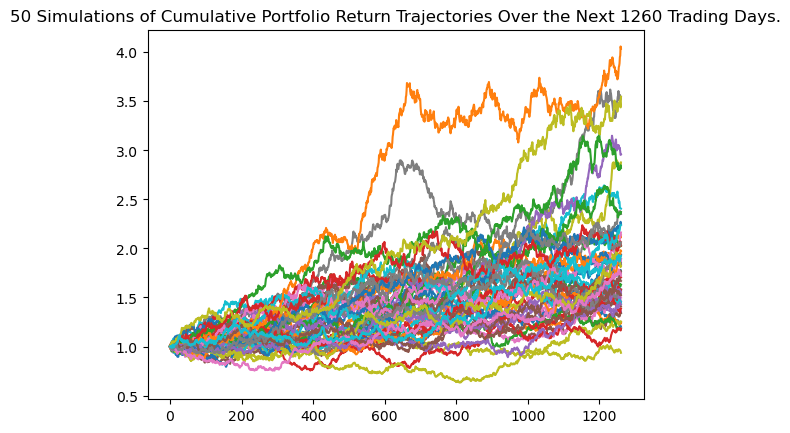

In [27]:
# Plot simulation outcomes
# YOUR CODE HERE!
five_year_mc.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 50 Simulations'}, ylabel='Frequency'>

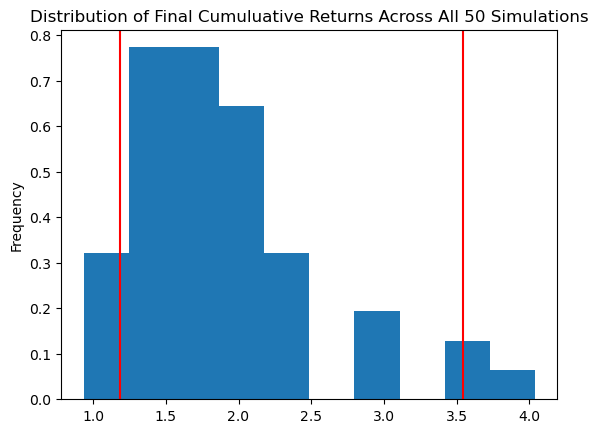

In [28]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
five_year_mc.plot_distribution()

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary_five_year_mc=five_year_mc.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
summary_five_year_mc

/Users/matt/Desktop/Instructions/Starter_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           50.000000
mean             1.897153
std              0.641527
min              0.936501
25%              1.471244
50%              1.757063
75%              2.115010
max              4.038455
95% CI Lower     1.181649
95% CI Upper     3.546271
Name: 1260, dtype: float64

In [30]:
# Set initial investment
# YOUR CODE HERE!
initial_investment=300000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
five_year_upper=round(summary_five_year_mc[9]*initial_investment,2)
five_year_lower=round(summary_five_year_mc[8]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${five_year_lower} and ${five_year_upper}")

There is a 95% chance that an initial investment of $300000 in the portfolio over the next 5 years will end within in the range of $354494.63 and $1063881.25


### Ten Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
timeframe="1Day"

start_date_ten=pd.Timestamp

In [32]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [33]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [34]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [59]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
# print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
#       f" over the next 10 years will end within in the range of"
#       f" ${ci_lower_ten} and ${ci_upper_ten}")